<h1 style="font-size:3rem;color:orange;">Classification Algorithms</h1>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import time 
from IPython.display import clear_output
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets, neighbors, linear_model
import pandas as pd
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import metrics as Metrics
import seaborn as sns



## KMeans 

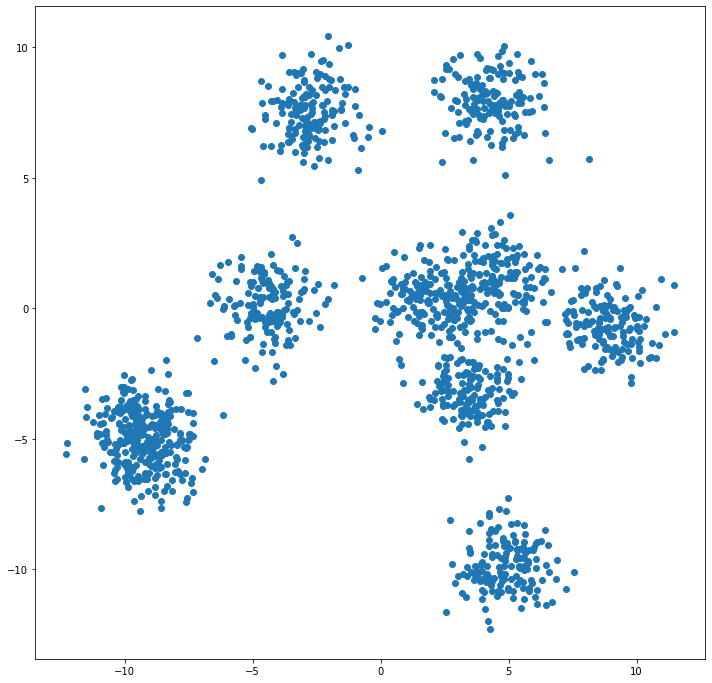

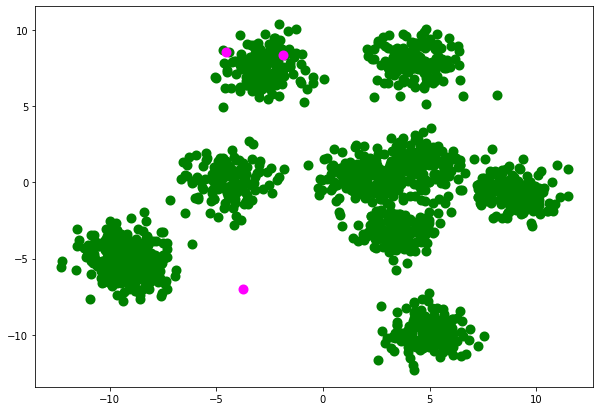

/home/isaac/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/isaac/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


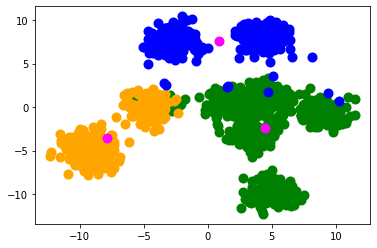

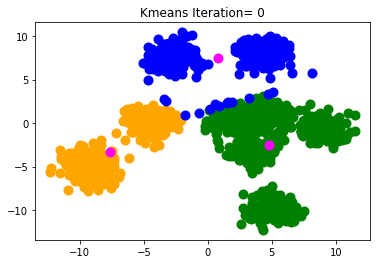

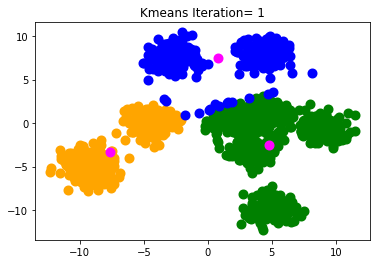

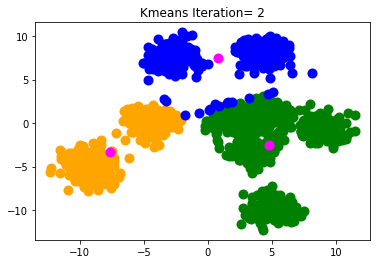

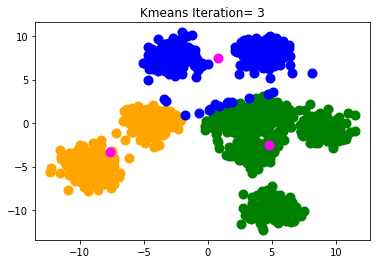

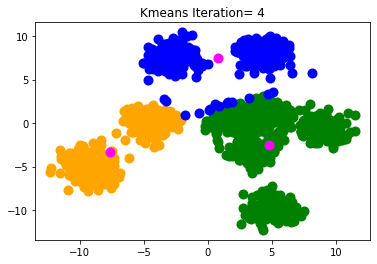

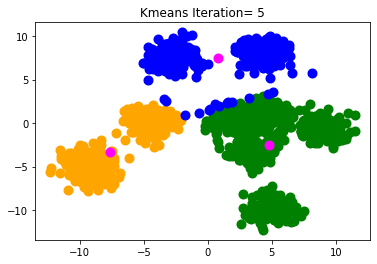

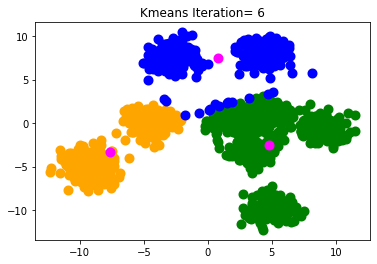

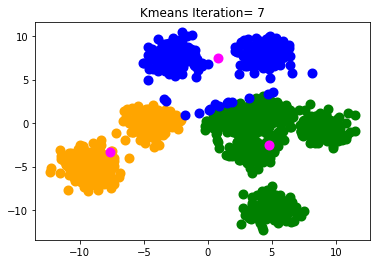

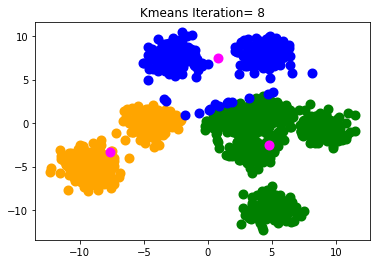

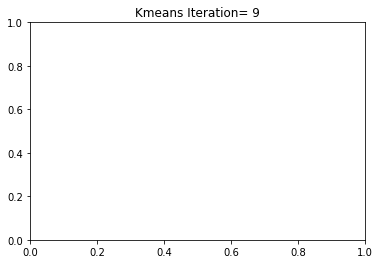

In [2]:
def Kmeans(df,K):
    
    #Centroids=df[np.random.choice(df.shape[0], size=K, replace=False)]
    Centroids=5.5*np.random.randn(3,2)
    y_pred=np.empty(len(df))
    fig = plt.figure(figsize = (10, 7))
    scat0=plt.scatter(df[:,0],df[:,1], color = "green", linewidth=4)
    scat3=plt.scatter(Centroids[:,0],Centroids[:,1], color="magenta",linewidth=4)
    plt.draw()
    plt.show()
    plt.pause(1)
    for h in range(10):
        cont=0;
        for i in df:
            Dist=np.zeros(K)
            for j in range(K):
                Dist[j]+=np.sqrt (((i[0]-Centroids[j][0])**2)+(i[1]-Centroids[j][1])**2)
            y_pred[cont]=np.argmin(Dist)
            cont+=1
            
            
            for j in range(K):
                CenData=df[y_pred==j]
                Centroids[j]=[np.mean(CenData[:,0]),np.mean(CenData[:,1])]
        
        scat0.remove()
        scat3.remove()
        if 'scat1' in locals():
            scat1.remove()   
            scat2.remove()
        scat0=plt.scatter(df[y_pred==0,0],df[y_pred==0,1], color = "green", linewidth=4)
        scat1=plt.scatter(df[y_pred==1,0],df[y_pred==1,1], color = "orange",linewidth=4)
        scat2=plt.scatter(df[y_pred==2,0],df[y_pred==2,1], color = "blue",linewidth=4)
        scat3=plt.scatter(Centroids[:,0],Centroids[:,1], color="magenta",linewidth=4)
        plt.draw()
        plt.show()
        plt.pause(1)

        
        plt.title('Kmeans Iteration= '+str(h))
        
        
        
        
        

plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state,centers=10,cluster_std=1)
plt.scatter(X[:, 0], X[:, 1])
Kmeans(X,3)


In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)


## KNN

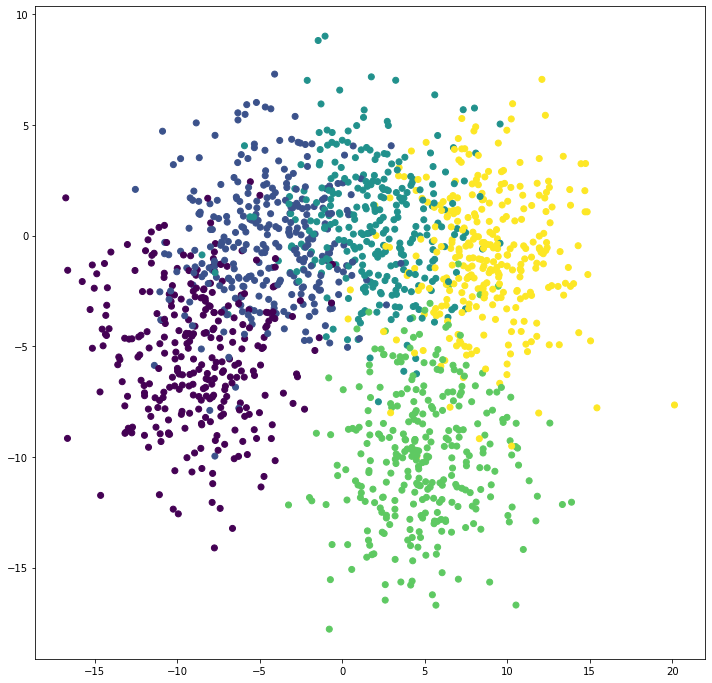

In [10]:
plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170
#X, y = make_blobs(n_samples=n_samples, random_state=random_state,centers=5,cluster_std=[1.0,3.0,2.0,.5,5])
X, y = make_blobs(n_samples=n_samples, random_state=random_state,centers=5,cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], c=y)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
tf.Tensor(
[[48  7  0  0  0]
 [ 6 51  6  0  0]
 [ 0  5 46  4  7]
 [ 0  0  4 51  3]
 [ 0  0  5  2 55]], shape=(5, 5), dtype=int32)


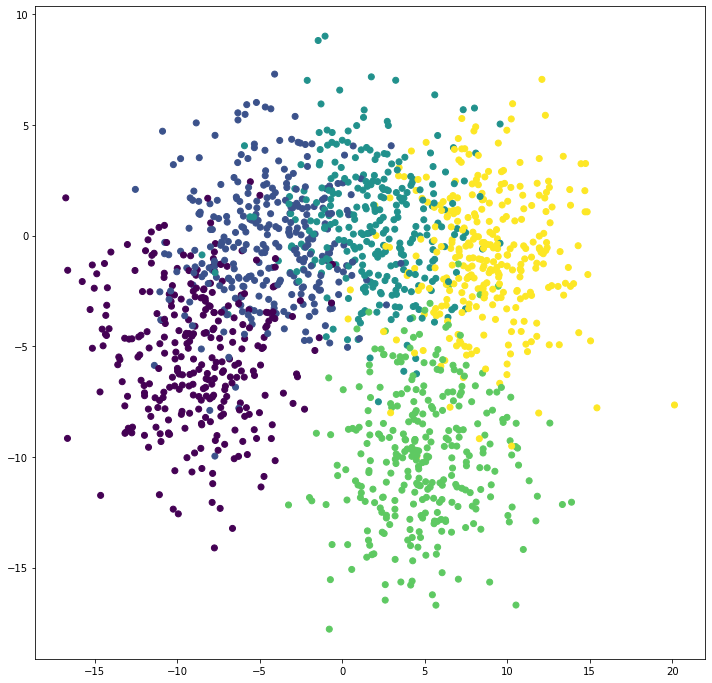

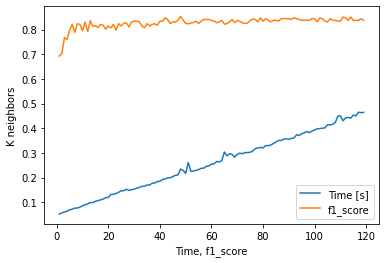

In [4]:

def KNN(df,targets):

    random_state = np.random.RandomState(0)
    x_train, x_test, train_labels, test_labels = train_test_split(df, targets,
                                                            test_size=.2,
                                                            random_state=random_state)
    y_pred=np.empty(len(x_test))
    clss=len(np.unique(train_labels))
    
    Time=[]
    f1Score=[]
    for h in np.arange(1,round(len(x_train)/(clss+5))): # Choose number of neighbours
        #clear_output(wait=True)
        print(h)
        start = time.time()
        cont=0
        for i in x_test:
            Dist=np.zeros(clss)
            for j in range(clss):
                neigh=x_train[train_labels==j]
                Nneigh=(neigh[np.random.choice(neigh.shape[0], 
                        size=h, replace=False)])
                for k in range(h):
                    Dist[j]+=np.sqrt (((i[0]-Nneigh[k][0])**2)+(i[1]-Nneigh[k][1])**2)
            y_pred[cont]=np.argmin(Dist)
            cont+=1
        end = time.time()
        
        Time.append(end-start)
        f1Score.append(f1_score(test_labels,y_pred,average='macro'))
    matrix = tf.math.confusion_matrix(test_labels, y_pred)
    print(matrix)
    plt.figure()
    plt.plot(np.arange(1,len(x_train)/(clss+5)),Time)
    plt.plot(np.arange(1,len(x_train)/(clss+5)),f1Score)
    plt.legend(['Time [s]','f1_score'])
    plt.xlabel('Time, f1_score')
    plt.ylabel('K neighbors')
    
plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state,centers=5,cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], c=y)
KNN(X,y)

KNN score: 0.947222


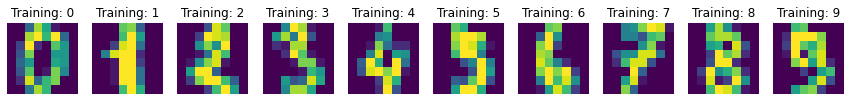

In [30]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False)

n_neighbors=15
knn = neighbors.KNeighborsClassifier(n_neighbors)
# knn.fit(X, y)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

## ANN  

/home/isaac/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


3/3 [==============================] - 0s 1ms/step - loss: 0.0028 - binary_accuracy: 0.9987 - precision_18: 0.9967 - recall_18: 0.9967 - true_negatives_18: 1199.0000 - false_positives_18: 1.0000


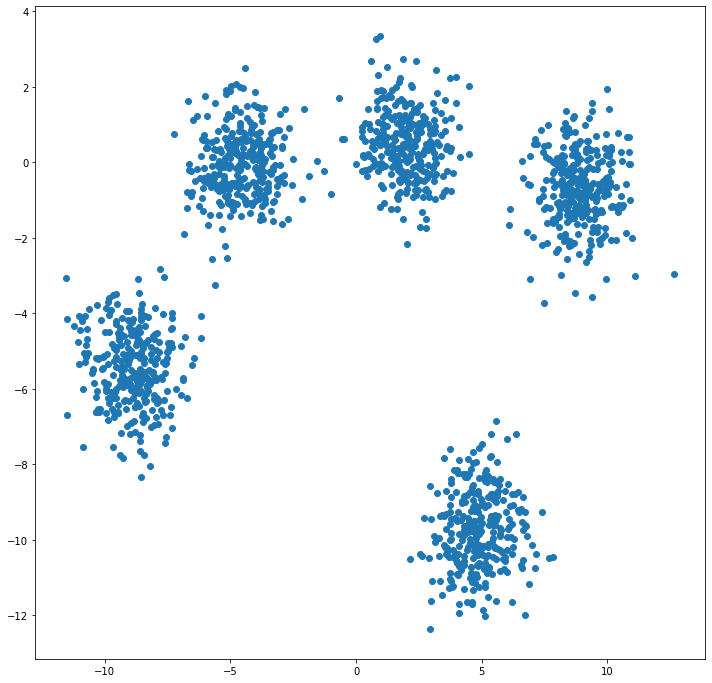

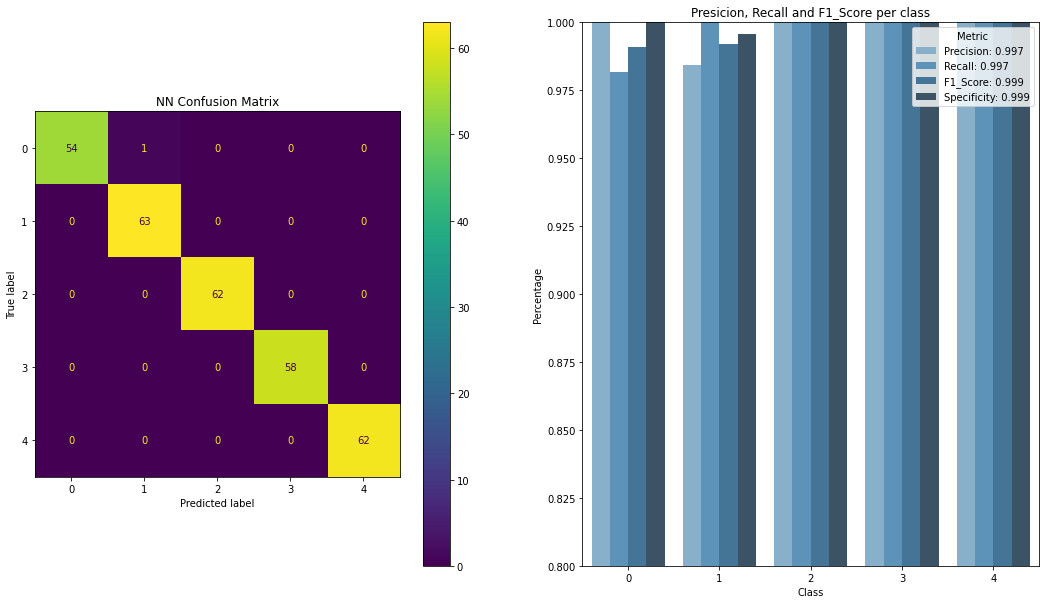

In [33]:

def TF(cm):
    tp=np.zeros(cm.shape[0])
    tn=np.zeros(cm.shape[0])
    fp=np.zeros(cm.shape[0])
    fn=np.zeros(cm.shape[0])
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[0]):
            if i==j:
                tp[i]=cm[i,j]
            if i!=j:
                fn[i]+=cm[i][j]        
                fp[i]+=cm[j][i]
                
    for k in range(cm.shape[0]):
        for i in range(cm.shape[0]):
            for j in range(cm.shape[0]):
                if i!=k and j!=k:
                    tn[k]+=cm[i][j]
                    
    return tp,tn,fp,fn

def NNplot(X,y):
    
    random_state = np.random.RandomState(0)
    X_train, X_test, train_labels, test_labels = train_test_split(X,y,
                                                            test_size=.2,
                                                            random_state=random_state)
    clss=len(np.unique(train_labels))
    network = models.Sequential()
    network.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(32, activation='relu'))
    network.add(layers.Dense(clss, activation='softmax'))
    
    network.compile(optimizer=Adam(lr=.001),
                  loss=losses.binary_crossentropy,
                  metrics=[metrics.binary_accuracy,metrics.Precision(), 
                            metrics.Recall(),
                            metrics.TrueNegatives(),
                            metrics.FalsePositives()])
    
    y_train = to_categorical(train_labels)
    history=network.fit(X_train,
        y_train,
        epochs=100,
        batch_size=128,
        validation_split=0.1,
        verbose=0)
    
    y_test_base = np.reshape(np.array([test_labels],dtype=np.int).T,(test_labels.shape[0]))
    y_test = to_categorical(test_labels)
    
    y_pred = network.predict(X_test)
    y_pred2=np.argmax(y_pred,axis=1)
    matrix = tf.math.confusion_matrix(y_test_base, y_pred2)
    to_hist=np.max(y_pred,axis=1)
    
    labels=list(np.arange(0,clss).astype(str))
    fig, axs = plt.subplots(1,2,figsize=(18,10))
    cm = Metrics.confusion_matrix(y_test_base, y_pred2)
    disp=Metrics.ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot(ax=axs[0])
    axs[0].set_title('NN Confusion Matrix')
    
    report=Metrics.classification_report(y_test_base, y_pred2)
    precisions, recall, f1_score, _ = Metrics.precision_recall_fscore_support(y_test_base, y_pred2)
    results = network.evaluate(X_test, y_test, batch_size=128)
    loss, acc, precision_new, recall_new, TN, FP=results
    tp,tn,fp,fn=TF(cm)
    Speci=tn/(tn+fp)
    
    Class=np.repeat(labels,4)
    MetricStruct=(np.vstack((precisions,recall,f1_score,Speci)).T).reshape(clss*4,)
    
    dataFrame2=pd.DataFrame({'Class':Class,'Percentage':MetricStruct,
                             'Metric':['Precision: '+str(round(precision_new,3)),
                                       'Recall: '+str(round(recall_new,3)),
                                       'F1_Score: '+str(round(acc,3)),
                                       'Specificity: ' +str(round(TN/(TN+FP),3))]*clss})
    sns.barplot(x="Class", y='Percentage', hue="Metric", data=dataFrame2,palette="Blues_d", ax=axs[1])
    axs[1].set_title('Presicion, Recall and F1_Score per class')
    axs[1].set_ylim(.8,1)
    
plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state,centers=5,cluster_std=1)
plt.scatter(X[:, 0], X[:, 1])
NNplot(X,y)

/home/isaac/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


3/3 [==============================] - 0s 2ms/step - loss: 0.0154 - binary_accuracy: 0.9969 - precision_19: 0.9861 - recall_19: 0.9833 - true_negatives_19: 3235.0000 - false_positives_19: 5.0000


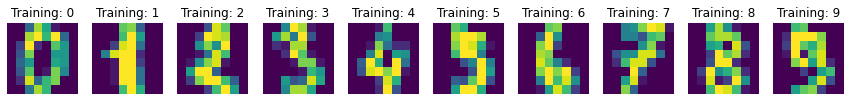

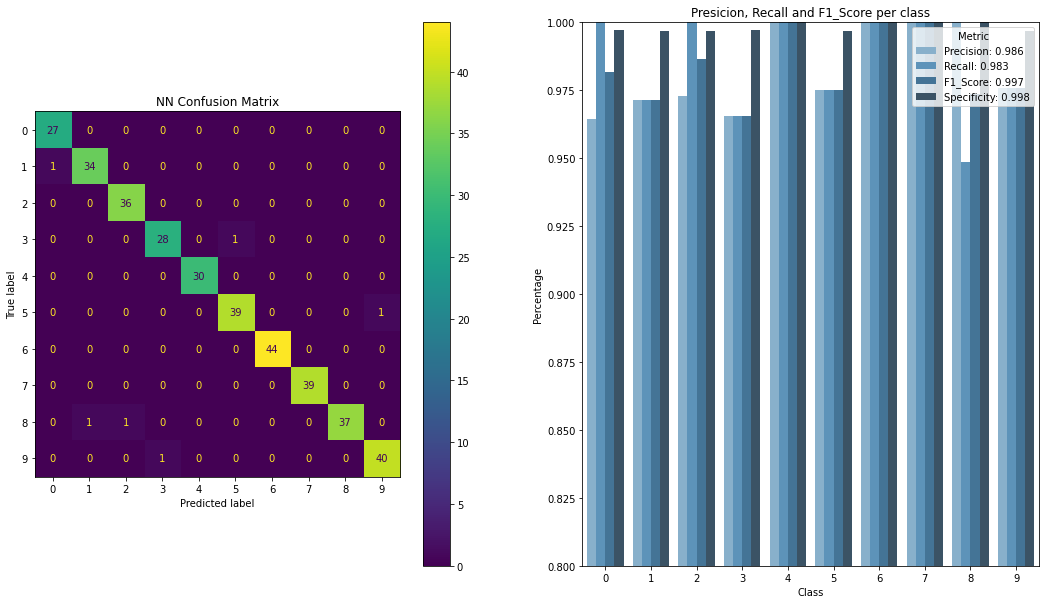

In [34]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

NNplot(data,digits.target)
